<a href="https://colab.research.google.com/drive/1Jn0GVjQyTs8tgv-faT7hqUOj1U6FkN5x?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Topic Modeling** 
is a technique to extract the hidden topics from large volumes of text. Latent Dirichlet Allocation(LDA) is a popular algorithm for topic modeling with excellent implementations in the Python’s Gensim package. 

The challenge, however, is how to extract good quality of topics that are clear, segregated and meaningful. This depends heavily on the quality of text preprocessing and the strategy of finding the optimal number of topics.

# **LDA Model (NGRAMS)**

In this notebook, we present the approach of using **NGRAMS (1-gram, 2-grams and 3-grams)** apprach to build a LDA topic model using the Gensim Library.

## **Import Libraries, Packages and Data**

In [ ]:
!pip install pyLDAvis
!pip install -U gensim==3.8.0

import pandas as pd
from pprint import pprint

import gensim
from gensim import corpora
from gensim.models import CoherenceModel

from nltk.tokenize import sent_tokenize, word_tokenize

import nltk
nltk.download('punkt')

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

     |████████████████████████████████| 1.7 MB 5.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=433258934c0e9309d6614c9aa223529d3935ec14e8be0333e72ffd4d18fa201f
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
     |████████████████████████████████| 24.2 MB 36.8 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**Mount to GDrive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Data**

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Hotel_Analysis/Hotel_Datasets/515k_Hotel_Reviews_NGRAMS_TOKENS.csv'
df = pd.read_csv(path)
df.head(5)

,cleaned_Reviews
0,"['backyard', 'hotel', 'total', 'mess', 'happen..."
1,"['cleaner', 'change', 'sheet', 'duvet', 'every..."
2,"['apart', 'price', 'brekfast', 'good']"
3,"['even', 'though', 'picture', 'show', 'clean',..."
4,"['aircondition', 'make', 'noise', 'hard', 'sle..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545181 entries, 0 to 545180
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   cleaned_Reviews  545181 non-null  object
dtypes: object(1)
memory usage: 4.2+ MB


**10000 random samples for Topic Modelling**

In [ ]:
df_sample = df.sample(10000, random_state=120)

In [ ]:
df_sample = df_sample.reset_index(drop=True)

In [ ]:
df_sample

,cleaned_Reviews
0,"['good', 'service', 'gave_u_free', 'upgrade', ..."
1,"['room', 'immaculate', 'complimentary', 'bar',..."
2,"['star', 'hotel', 'room', 'shockingly', 'small..."
3,"['great', 'city', 'grea', 'thotel', 'great', '..."
4,"['front_desk', 'help', 'wonderful', 'true', 'd..."
...,...
9995,"['room', 'small', 'tiny', 'tiny', 'awfully', '..."
9996,"['staff', 'roof_terrace']"
9997,"['staff', 'grim', 'unhelpful']"
9998,"['get', 'little', 'loud', 'hotel', 'people', '..."


## **Reviews Pre-processing**

**Remove Punctuations**

In [ ]:
df_sample["Reviews"] = df_sample['cleaned_Reviews'].str.replace('[^\w\s]','')

<input>:1: DeprecationWarning: invalid escape sequence \w
<ipython-input-8-1e9b69d4e2be>:1: DeprecationWarning: invalid escape sequence \w
  df_sample["Reviews"] = df_sample['cleaned_Reviews'].str.replace('[^\w\s]','')
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


**Create Dataframe of Reviews**

In [ ]:
# Extract only reviews text
reviews = df_sample.Reviews

In [ ]:
reviews.head()

0    good service gave_u_free upgrade bottle bubble...
1    room immaculate complimentary bar double showe...
2    star hotel room shockingly small literally fit...
3                  great city grea thotel great people
4    front_desk help wonderful true delight stay mo...
Name: Reviews, dtype: object

**Convert reviews dataframe to list**

In [ ]:
reviews = reviews.tolist()

**Tokenize the sentence into words**

In [ ]:
import string 

#Tokenize the sentence into words
reviews_tokens = [word_tokenize(t) for t in reviews]

**Samples of reviews tokens**

In [ ]:
reviews_tokens[:5]

[['good',
  'service',
  'gave_u_free',
  'upgrade',
  'bottle',
  'bubble',
  'room',
  'victoria',
  'sponge',
  'thank'],
 ['room',
  'immaculate',
  'complimentary',
  'bar',
  'double',
  'shower',
  'view',
  'oxford_street',
  'angelica',
  'reception',
  'delightful',
  'done',
  'able',
  'shop',
  'come',
  'back',
  'rest',
  'shop',
  'going',
  'palladium',
  'wonderful',
  'dinner',
  'grill',
  'caught',
  'bus',
  'argyll',
  'street',
  'ten',
  'minute',
  'amazing'],
 ['star',
  'hotel',
  'room',
  'shockingly',
  'small',
  'literally',
  'fit',
  'bed',
  'table',
  'bathroom',
  'term',
  'little',
  'touch',
  'make',
  'star',
  'hotel',
  'experience',
  'bathrobe_slipper',
  'room',
  'made',
  'got',
  'back',
  'strangely',
  'pen',
  'commend',
  'spa',
  'yet',
  'short',
  'space'],
 ['great', 'city', 'grea', 'thotel', 'great', 'people'],
 ['front_desk',
  'help',
  'wonderful',
  'true',
  'delight',
  'stay',
  'morning',
  'brekfast',
  'delight',
  '

**Create a dictionary (mapping between words and their integer ids)**

In [ ]:
dictionary = corpora.Dictionary(reviews_tokens)  

**Converts the word to its integer word id and returns the result as a sparse vector (using Doc2bow Doc term matrix)**

In [ ]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in reviews_tokens]

**Samples of doc_term_matrix (corpus)**

In [ ]:
doc_term_matrix[:5]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1)],
 [(4, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 2),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1)],
 [(4, 2),
  (14, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 2),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 2),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1)],
 [(62, 1), (63, 1), (64, 2), (65, 1), (66, 1)],
 [(37, 1),
  (67, 1),
  (68, 2),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 2),
  (73, 1),
  (74, 1)]]

**Human readable format of corpus**

In [ ]:
# Human readable format of corpus
[[(dictionary[id], freq) for id, freq in cp] for cp in doc_term_matrix[:5]]

[[('bottle', 1),
  ('bubble', 1),
  ('gave_u_free', 1),
  ('good', 1),
  ('room', 1),
  ('service', 1),
  ('sponge', 1),
  ('thank', 1),
  ('upgrade', 1),
  ('victoria', 1)],
 [('room', 1),
  ('able', 1),
  ('amazing', 1),
  ('angelica', 1),
  ('argyll', 1),
  ('back', 1),
  ('bar', 1),
  ('bus', 1),
  ('caught', 1),
  ('come', 1),
  ('complimentary', 1),
  ('delightful', 1),
  ('dinner', 1),
  ('done', 1),
  ('double', 1),
  ('going', 1),
  ('grill', 1),
  ('immaculate', 1),
  ('minute', 1),
  ('oxford_street', 1),
  ('palladium', 1),
  ('reception', 1),
  ('rest', 1),
  ('shop', 2),
  ('shower', 1),
  ('street', 1),
  ('ten', 1),
  ('view', 1),
  ('wonderful', 1)],
 [('room', 2),
  ('back', 1),
  ('bathrobe_slipper', 1),
  ('bathroom', 1),
  ('bed', 1),
  ('commend', 1),
  ('experience', 1),
  ('fit', 1),
  ('got', 1),
  ('hotel', 2),
  ('literally', 1),
  ('little', 1),
  ('made', 1),
  ('make', 1),
  ('pen', 1),
  ('shockingly', 1),
  ('short', 1),
  ('small', 1),
  ('spa', 1),
  (

## **Model Building**

**Compute coherence score for models with different number of topics (Try from 2 topics - 40 topics)**

In [ ]:
# Testing of which number of topics is the most optimal
# Compute coherence score for each number of topics between 2 - 40 topics

#
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus= corpus,
                                                num_topics=num_topics,
                                                id2word=dictionary,
                                                random_state=100,
                                                update_every=1,
                                                chunksize=1000,
                                                passes=10, 
                                                alpha='auto',
                                                per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Compute coherence score between 2 - 30 topics with a step of 2 for each iteration

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=reviews_tokens, start=2, limit=40, step=2)

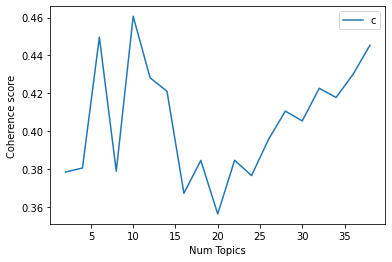

In [ ]:
# Show graph
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3784
Num Topics = 4  has Coherence Value of 0.3806
Num Topics = 6  has Coherence Value of 0.4496
Num Topics = 8  has Coherence Value of 0.3789
Num Topics = 10  has Coherence Value of 0.4607
Num Topics = 12  has Coherence Value of 0.4282
Num Topics = 14  has Coherence Value of 0.4211
Num Topics = 16  has Coherence Value of 0.3672
Num Topics = 18  has Coherence Value of 0.3846
Num Topics = 20  has Coherence Value of 0.3563
Num Topics = 22  has Coherence Value of 0.3847
Num Topics = 24  has Coherence Value of 0.3766
Num Topics = 26  has Coherence Value of 0.3956
Num Topics = 28  has Coherence Value of 0.4106
Num Topics = 30  has Coherence Value of 0.4054
Num Topics = 32  has Coherence Value of 0.4226
Num Topics = 34  has Coherence Value of 0.4178
Num Topics = 36  has Coherence Value of 0.43
Num Topics = 38  has Coherence Value of 0.4454


Finding the optimal number of topics is to build many LDA models with different values of number of topics (k) and pick the one that gives the highest coherence value.

Observing the line graph, we can see that coherence score peaked at around 10 topics.

Hence, we will be choosing 10 number of topics to build our topic model and investigate further.

## **Topic Model with Num Topic = 10**

In [ ]:
import time

start_time = time.time()

# Single core LDA
NUM_TOPICS = 10

lda_model = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=NUM_TOPICS, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=1000,
                                           passes=10,
                                           alpha='auto')
                                          #  per_word_topics=True)

print("--- %s seconds ---" % (time.time() - start_time))

--- 35.217012882232666 seconds ---


**Save & Load the model**

In [ ]:
# Save & Load the model
lda_model.save('/content/drive/MyDrive/Colab Notebooks/Hotel_Analysis/Models/LDA_model_NGRAMS')
lda_model = gensim.models.ldamodel.LdaModel.load('/content/drive/MyDrive/Colab Notebooks/Hotel_Analysis/Models/LDA_model_NGRAMS')

**Show Topic Keywords**

In [ ]:
# Show the 5 most dominant words in each topic

lda_model.print_topics(num_words = 10)

[(0,
  '0.045*"stay" + 0.031*"station" + 0.028*"place" + 0.023*"walk" + 0.020*"metro" + 0.019*"hotel" + 0.018*"city" + 0.017*"modern" + 0.016*"easy" + 0.016*"close"'),
 (1,
  '0.038*"expensive" + 0.037*"wifi" + 0.028*"price" + 0.026*"better" + 0.025*"free" + 0.024*"coffee" + 0.022*"poor" + 0.017*"decor" + 0.015*"tea" + 0.013*"welcoming"'),
 (2,
  '0.057*"loved" + 0.047*"every" + 0.032*"kind" + 0.024*"paris" + 0.018*"amsterdam" + 0.017*"within" + 0.016*"thing" + 0.016*"quick" + 0.014*"trip" + 0.013*"soft"'),
 (3,
  '0.029*"night" + 0.028*"one" + 0.023*"time" + 0.022*"bad" + 0.017*"first" + 0.017*"two" + 0.017*"day" + 0.014*"booked" + 0.014*"standard" + 0.014*"room"'),
 (4,
  '0.079*"amazing" + 0.036*"check" + 0.027*"back" + 0.025*"come" + 0.022*"best" + 0.021*"atmosphere" + 0.018*"ideal" + 0.017*"ever" + 0.014*"charged" + 0.014*"value_money"'),
 (5,
  '0.085*"staff" + 0.080*"room" + 0.074*"location" + 0.051*"breakfast" + 0.050*"hotel" + 0.048*"good" + 0.043*"great" + 0.036*"friendly" + 

**Compute Perplexity & Coherence Score**

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=reviews_tokens, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.192485928407458

Coherence Score:  0.46068857135498603


## **Visualize the topics using pyLDAvis**

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.385416  0.079991       1        1  41.770217
6     -0.193018 -0.210257       2        1  14.918076
0     -0.045361  0.268151       3        1   9.530044
1      0.009803  0.008061       4        1   8.085765
3      0.037530 -0.159473       5        1   7.439895
7      0.078821 -0.150875       6        1   5.628326
4      0.124452  0.026835       7        1   3.348289
9      0.116069  0.027694       8        1   3.237481
8      0.114580  0.071803       9        1   3.185272
2      0.142540  0.038072      10        1   2.856636, topic_info=          Term         Freq        Total Category  logprob  loglift
109      staff  2735.000000  2735.000000  Default  30.0000  30.0000
4         room  3881.000000  3881.000000  Default  29.0000  29.0000
98    location  2363.000000  2363.000000  Default  28.0000  28.0000
53       small   702.000000   702.000000  Default  27.0000  27.0000
3         good  1545.000000  1545.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
1336  property    11.581050    12.411784  Topic10  -5.2445   3.4862
521   complete    11.456566    12.287363  Topic10  -5.2553   3.4855
216      thing    34.956803    88.109008  Topic10  -4.1397   2.6311
348       hear    16.576567    37.241302  Topic10  -4.8859   2.7461
24       going    15.033132    54.507903  Topic10  -4.9836   2.2674

[425 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
1737      6  0.990140        absolutely
694       7  0.978518     accommodating
763       2  0.991258  air_conditioning
681       3  0.994933           airport
126       1  0.509901              also
...     ...       ...               ...
628       4  0.958282           working
628       6  0.028605           working
899       7  0.945860             worst
1859      5  0.983206              year
61       10  0.949362               yet

[510 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 7, 1, 2, 4, 8, 5, 10, 9, 3])

**Observation of Topics:**

We managed to obtain a very diverse range of topics. This can be seen from the intertopic distance visualisation. 

Unfortunately, the topics that we obtained only gave us a very 'surface' understanding of the most mentioned topics in the reviews. Also, topic keywords like 'good', 'great', 'small', 'friendly' suggests that adjectives are present in our topic keywords, however, these words bring little to no value to us. We would attempt trying out the topic modelling using purely nouns in the LDA Mallet (NGRAMS + NOUNS) approach.